# Activation function 

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.backends.backend_pdf import PdfPages

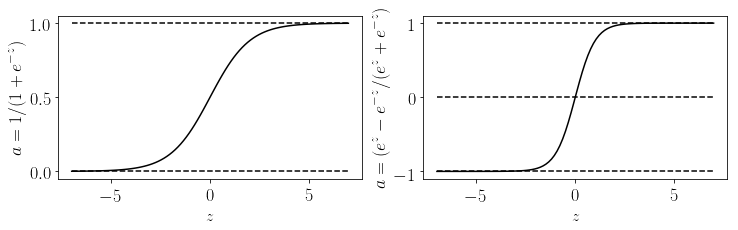

In [12]:
s = 7
x = np.linspace(-s, s, 100)


z1 = np.exp(x)
z2 = np.exp(-x)
sigmoid = 1/(1 + z2)
tanh = (z1 - z2)/(z1 + z2)

nrows = 1
ncols = 2
width = 6*ncols
height = 3*nrows
plt.close('all')
fig,axs=plt.subplots(nrows,ncols,figsize=(width,height)) 

axs[0].plot(x, sigmoid, 'k')
axs[0].plot([-s, s], [0, 0], '--', color = 'k')
axs[0].plot([-s, s], [1, 1], '--', color = 'k')
# axs[0].set_title('$y = \frac{1}{1 + exp(-z)}$')
axs[0].set_xlabel('$z$', fontsize = 16)
axs[0].set_ylabel('$a = 1/(1 + e^{-z})$', fontsize = 18)
axs[0].tick_params(axis='both', which='major', labelsize=18)

axs[1].plot(x, tanh, 'k')
axs[1].plot([-s, s], [0, 0], '--', color = 'k')
axs[1].plot([-s, s], [-1, -1], '--', color = 'k')
axs[1].plot([-s, s], [1, 1], '--', color = 'k')
axs[1].tick_params(axis='both', which='major', labelsize=18)
axs[1].set_xlabel('$z$', fontsize = 16)
axs[1].set_ylabel('$a = (e^{z} - e^{-z}/(e^{z} + e^{-z})$', fontsize = 18)
filename = 'sigmoid_tanh.pdf'
with PdfPages(filename) as pdf:
    pdf.savefig(bbox_inches='tight')
plt.show()

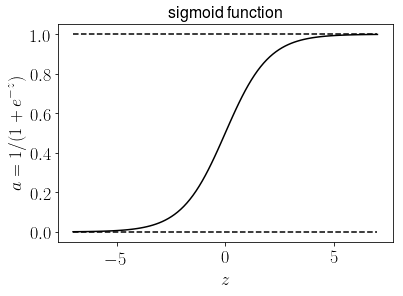

In [13]:
plt.plot(x, sigmoid, color = 'k')
plt.plot([-s, s], [0, 0], '--', color = 'k')
plt.plot([-s, s], [1, 1], '--', color = 'k')
# axs[0].set_title('$y = \frac{1}{1 + exp(-z)}$')
plt.xlabel('$z$', fontsize = 18)
plt.ylabel('$a = 1/(1 + e^{-z})$', fontsize = 18)
plt.title('sigmoid function', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=18)

filename = 'sigmoid.pdf'
with PdfPages(filename) as pdf:
    pdf.savefig(bbox_inches='tight')
plt.show()

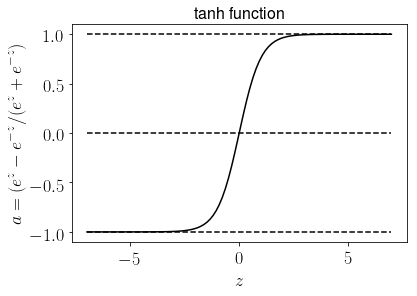

In [14]:
plt.plot(x, tanh, color = 'k')
plt.plot([-s, s], [0, 0], '--', color = 'k')
plt.plot([-s, s], [-1, -1], '--', color = 'k')
plt.plot([-s, s], [1, 1], '--', color = 'k')
# axs[0].set_title('$y = \frac{1}{1 + exp(-z)}$')
plt.xlabel('$z$', fontsize = 18)
plt.ylabel('$a = (e^{z} - e^{-z}/(e^{z} + e^{-z})$', fontsize = 18)
plt.title('tanh function', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=18)

filename = 'tanh.pdf'
with PdfPages(filename) as pdf:
    pdf.savefig(bbox_inches='tight')
plt.show()

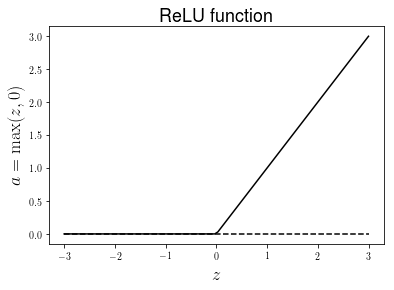

In [15]:
x = np.linspace(-3, 3, 100)
r = np.maximum(0, x)
s = 3
plt.plot([-s, 3], [0, 0], '--', color = 'k')
plt.plot(x, r, '-', color = 'k')
# plt.axis('equal')
plt.xlabel('$z$', fontsize = 18)
plt.ylabel('$a = \max(z, 0)$', fontsize = 18)
plt.title('ReLU function', fontsize = 18)
filename = 'relu.pdf'
with PdfPages(filename) as pdf:
    pdf.savefig(bbox_inches='tight')
plt.show()

# Ví dụ 

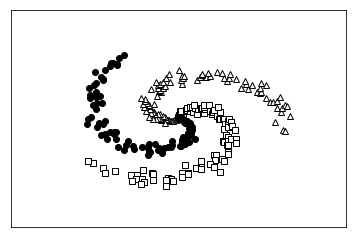

In [34]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((N*C, d0)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in xrange(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[:N, 0], X[:N, 1], 'ws',  markersize = 6, mec = 'k');
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'w^', markersize = 6, mec = 'k');
plt.plot(X[2*N:, 0], X[2*N:, 1], 'ko', markersize = 6, mec = 'k');
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
filename = 'EX.pdf'
with PdfPages(filename) as pdf:
    pdf.savefig(bbox_inches='tight')
# plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

In [35]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each row of Z is a set of scores.    
    """
    e_Z = np.exp(Z - np.max(Z, axis = 1, keepdims = True))
    A = e_Z / e_Z.sum(axis = 1, keepdims = True)
    return A

def crossentropy_loss(Yhat, y):
    """
    Yhat: a numpy array of shape (Npoints, nClasses) -- predicted output 
    y: a numpy array of shape (Npoints) -- ground truth. We don't need to use 
    the one-hot vector here since most of elements are zeros. When programming 
    in numpy, we need to use the corresponding indexes only.
    """
    id0 = range(Yhat.shape[0])
    return -np.mean(np.log(Yhat[id0, y]))



In [36]:
def mlp_init(d0, d1, d2):
    """ 
    Initialize W1, b1, W2, b2 
    d0: dimension of input data 
    d1: number of hidden unit 
    d2: number of output unit = number of classes
    """
    W1 = 0.01*np.random.randn(d0, d1)
    b1 = np.zeros(d1)
    W2 = 0.01*np.random.randn(d1, d2)
    b2 = np.zeros(d2)
    return (W1, b1, W2, b2)

def mlp_predict(X, W1, b1, W2, b2):
    """
    Suppose that the network has been trained, predict class of new points. 
    X: data matrix, each ROW is one data point.
    W1, b1, W2, b2: learned weight matrices and biases 
    """
    Z1 = X.dot(W1) + b1    # shape (N, d1)
    A1 = np.maximum(Z1, 0) # shape (N, d1)
    Z2 = A1.dot(W2) + b2   # shape (N, d2)
    return np.argmax(Z2, axis=1)

def mlp_fit(X, y, W1, b1, W2, b2, eta):
    loss_hist = []
    for i in xrange(10000):
        # feedforward 
        Z1 = X.dot(W1) + b1       # shape (N, d1)
        A1 = np.maximum(Z1, 0)    # shape (N, d1)
        Z2 = A1.dot(W2) + b2      # shape (N, d2)
        Yhat = softmax_stable(Z2) # shape (N, d2)
        
        if i %1000 == 0: # print loss after each 1000 iterations
            loss = crossentropy_loss(Yhat, y)
            print("iter %d, loss: %f" %(i, loss))
            loss_hist.append(loss)

        # back propagation
        id0 = range(Yhat.shape[0])
        Yhat[id0, y] -=1 
        E2 = Yhat/N                # shape (N, d2)
        dW2 = np.dot(A1.T, E2)     # shape (d1, d2)
        db2 = np.sum(E2, axis = 0) # shape (d2,)
        E1 = np.dot(E2, W2.T)      # shape (N, d1)
        E1[Z1 <= 0] = 0            # gradient of ReLU, shape (N, d1)
        dW1 = np.dot(X.T, E1)      # shape (d0, d1)
        db1 = np.sum(E1, axis = 0) # shape (d1,)

        # Gradient Descent update
        W1 += -eta*dW1
        b1 += -eta*db1
        W2 += -eta*dW2
        b2 += -eta*db2
    return (W1, b1, W2, b2, loss_hist)

iter 0, loss: 1.098607
iter 1000, loss: 0.641625
iter 2000, loss: 0.453020
iter 3000, loss: 0.265229
iter 4000, loss: 0.197735
iter 5000, loss: 0.165735
iter 6000, loss: 0.147055
iter 7000, loss: 0.134113
iter 8000, loss: 0.124013
iter 9000, loss: 0.113980
training accuracy: 95.33 %


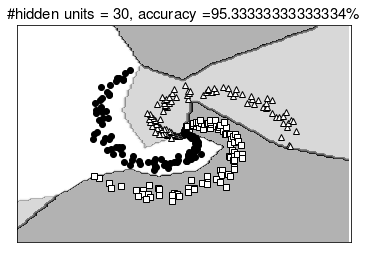

In [45]:
d0 = 2
d1 = h = 30 # size of hidden layer [2, 5, 15, 30, 100]
d2 = C = 3
eta = .05 # learning rate
# initialize parameters randomly
(W1, b1, W2, b2) = mlp_init(d0, d1, d2)
(W1, b1, W2, b2, loss_hist) =mlp_fit(X, y, W1, b1, W2, b2, eta)

y_pred = mlp_predict(X, W1, b1, W2, b2)
acc = 100*np.mean(y_pred == y)
print('training accuracy: %.2f %%' % acc)

# Visualize results

xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

# print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)


X0 = np.vstack((xx1, yy1)).T
Z = mlp_predict(X0, W1, b1, W2, b2)
Z = Z.reshape(xx.shape)

plt.clf()
CS = plt.contourf(xx, yy, Z, 200, cmap='gray', alpha = .3)

# N = 100
# print(N)

plt.plot(X[:N, 0], X[:N, 1], 'ws',  markersize = 6, mec = 'k');
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'w^', markersize = 6, mec = 'k');
plt.plot(X[2*N:, 0], X[2*N:, 1], 'ko', markersize = 6, mec = 'k');

# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
str0 = '\#hidden units = ' + str(d1) + ', accuracy =' + str(acc) + '\%'
plt.title(str0, fontsize = 15)

filename = 'ex_res'+ str(d1) + '.pdf'
with PdfPages(filename) as pdf:
    pdf.savefig(bbox_inches='tight')
plt.show()

# over fitting test 

training accuracy: 100.00 %
saving nn_overfitting_0001.pdf


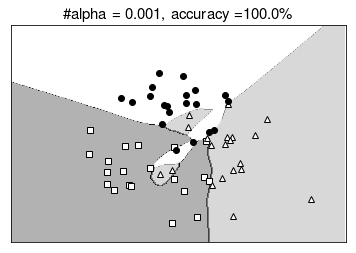

training accuracy: 100.00 %
saving nn_overfitting_001.pdf


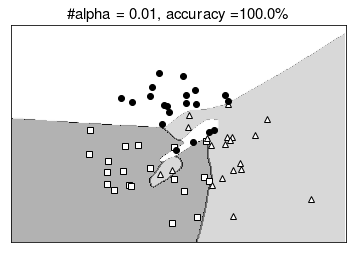

training accuracy: 98.33 %
saving nn_overfitting_01.pdf


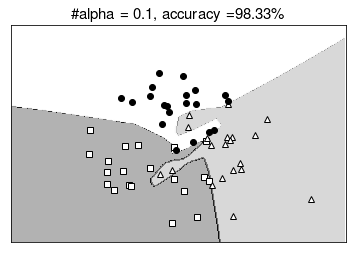

training accuracy: 80.00 %
saving nn_overfitting_1.pdf


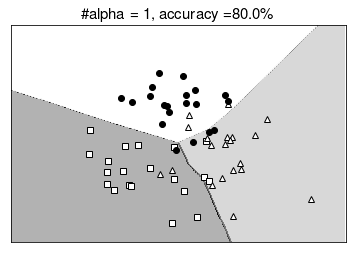

training accuracy: 80.00 %
saving nn_overfitting_10.pdf


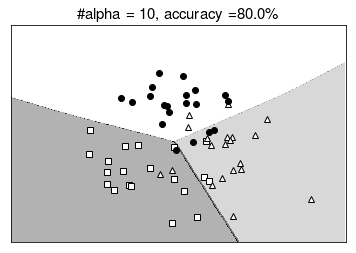

In [11]:
from __future__ import print_function 
import numpy as np 
from sklearn.neural_network import MLPClassifier
np.random.seed(1)
means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
y = np.asarray([0]*N + [1]*N + [2]*N)

alpha = 1e-2# regularization parameter 
def draw(alpha): 
    np.random.seed(1)
    filename = 'nn_overfitting_' + ''.join(str(alpha).split('.'))+'.pdf'
# filename = 'nn_overfitting_0001.pdf'

    clf = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(100))
    clf.fit(X, y)
    y_pred = clf.predict(X) 
    acc = 100*np.mean(y_pred == y)
    print('training accuracy: %.2f %%' % acc)

    xm = np.arange(-4, 4, 0.025)
    xlen = len(xm)
    ym = np.arange(-4, 4, 0.025)
    ylen = len(ym)
    xx, yy = np.meshgrid(xm, ym)

    xx1 = xx.ravel().reshape(1, xx.size)
    yy1 = yy.ravel().reshape(1, yy.size)


    X0 = np.vstack((xx1, yy1)).T
    Z = clf.predict(X0)
    Z = Z.reshape(xx.shape)

    plt.clf()
    CS = plt.contourf(xx, yy, Z, 200, cmap='gray', alpha = .3)

    plt.plot(X[:N, 0], X[:N, 1], 'ws',  markersize = 6, mec = 'k');
    plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'w^', markersize = 6, mec = 'k');
    plt.plot(X[2*N:, 0], X[2*N:, 1], 'ko', markersize = 6, mec = 'k');

    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.xticks(())
    plt.yticks(())
    
    # pricision until 2 digits after decimal point 
    acc = int(acc*100)/100.
    str0 = '\#alpha = ' + str(alpha) + ', accuracy =' + str(acc) + '\%'
    plt.title(str0, fontsize = 15)

    print('saving ' + filename)
    with PdfPages(filename) as pdf:
        pdf.savefig(bbox_inches='tight')
    plt.show()
    
for alpha in [1e-3, 1e-2, 1e-1, 1, 10]: draw(alpha)